In [397]:
fads = ['baby_stacking_cups', 'BB-8_Toy', 'Cards_Against_Humanity', 'Exploding_Kittens',
       'little_tikes_basketball', 'Polar_express_toy_train', 'princess_castle_tent', 'Remote_control_monster_truck', 'stuffed_elephant',
       'ticket_to_ride', 'Vector_robot', 'what_do_you_meme']
stables = ['automatic_card_shuffler', 'Baby_Einstein_Toy', 'connect_4',
          'dyson_vacuum_toy', 'five_crowns', 'gumby_toy', 'jenga', 'Kid_roller_coaster',
          'left_right_center', 'Magna_Tiles', 'magnet_tiles', 'Mini_bounce_house', 'Mini_John_Deere',
          'Mini_play_kitchen', 'monopoly_deal', 'Play_kitchen', 'pokemon_cards', 'Ultimate_kitchen_playset']
unclears = ['4k_drone', 'Camera_drone', 'drone_toy', 'GPS_drone', 'HD_drone', 'Jumbo_doll_house', 'sequence_game', 'small_magnet_tiles',
           'suspend_game']

In [398]:
import pandas as pd
import matplotlib.pyplot as plt

In [455]:
csvName = "what_do_you_meme.csv"

In [456]:
prodName = csvName.replace('.csv', '').replace('_', ' ')
formalProdName = prodName.title()

In [457]:
df = pd.read_csv(csvName)
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.sort_values(by = 'timestamp')
df["date"] = df["timestamp"].dt.floor("D")
daily_counts = df.groupby("date").size().rename("daily_reviews")

In [458]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,date
759,5.0,Fun!,Played it with a group of 13. Very fun. We all...,[],B01MRG7T0D,B0C4CTC9H5,AGVKW3O2O7YT37UVMCHJZKQ242ZQ,2016-12-19 19:55:31,2,True,2016-12-19
1946,5.0,AMAZING :),I waited a long time for this game. I knew if ...,[],B01MRG7T0D,B0C4CTC9H5,AFMQJNNTGORVL743KB4HOEY3W6HQ,2016-12-21 11:43:52,2,True,2016-12-21
5784,5.0,Click add to cart right now!,This game is so fun and funny and especially i...,[],B01MRG7T0D,B0C4CTC9H5,AHBAUJKHT5EVIXKTDH3EM6USQJJA,2016-12-21 22:08:25,1,True,2016-12-21
3016,2.0,So I really liked the idea of this game,"So I really liked the idea of this game, my ki...",[],B01MRG7T0D,B0C4CTC9H5,AEC2DONLQUOBVVWZPT3HK57RXGYA,2016-12-22 07:29:29,11,True,2016-12-22
3546,5.0,Five Stars,So funny- if you love &#34;Cards Against Human...,[],B01MRG7T0D,B0C4CTC9H5,AECPQBAS4ML67YJHMBWNA5BSKKFA,2016-12-23 03:05:27,1,True,2016-12-23


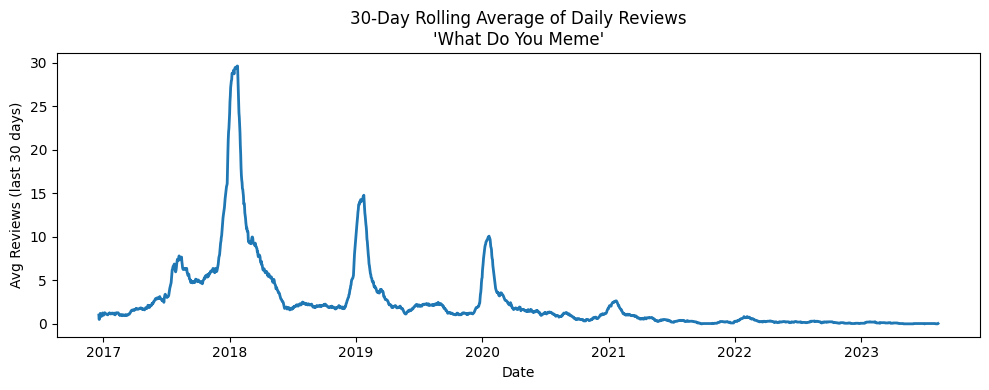

In [459]:
full_range = pd.date_range(daily_counts.index.min(), daily_counts.index.max(), freq="D")
daily_counts = daily_counts.reindex(full_range, fill_value=0)
daily_counts.index.name = "date"

# 5) rolling 30-day average
rolling_30 = daily_counts.rolling(window=30, min_periods=1).mean()

# 6) plot (single chart, clean look)
plt.figure(figsize=(10,4))
plt.plot(rolling_30.index, rolling_30.values, linewidth=2)
plt.title(f"30-Day Rolling Average of Daily Reviews\n'{formalProdName}'")
plt.xlabel("Date")
plt.ylabel("Avg Reviews (last 30 days)")
plt.tight_layout()
plt.show()

In [460]:
trends_df = pd.read_csv("historic_google_trends.csv")
trends_df = trends_df[trends_df['term'] == prodName]
trends_df

,Unnamed: 0,date,value,ratio_month,ratio_6mo,ratio_year,term
27,27,2004-01-01,0,NaN,NaN,NaN,what do you meme
53,53,2004-01-01,0,NaN,NaN,NaN,what do you meme
91,91,2004-02-01,0,NaN,NaN,NaN,what do you meme
103,103,2004-02-01,0,NaN,NaN,NaN,what do you meme
172,172,2004-03-01,0,NaN,NaN,NaN,what do you meme
...,...,...,...,...,...,...,...
19814,19814,2025-09-01,22,1.023256,0.881469,0.751149,what do you meme
19845,19845,2025-10-01,26,1.130435,1.034826,0.884817,what do you meme
19896,19896,2025-10-01,26,1.130435,1.034826,0.884817,what do you meme
19913,19913,2025-11-01,31,1.203883,1.227723,1.046074,what do you meme


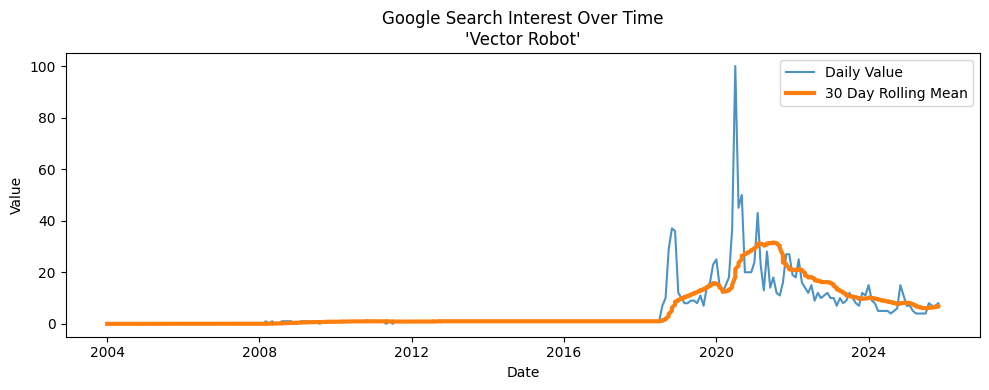

In [453]:
# make sure date is datetime type
trends_df['date'] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values('date')

# rolling smoothing
trends_df['smoothed'] = trends_df['value'].rolling(window=30, min_periods=1).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(trends_df['date'], trends_df['value'], alpha=0.8, label='Daily Value')
plt.plot(trends_df['date'], trends_df['smoothed'], linewidth=3, label='30 Day Rolling Mean')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title(f"Google Search Interest Over Time\n'{formalProdName}'")
plt.legend()
plt.tight_layout()
plt.show()

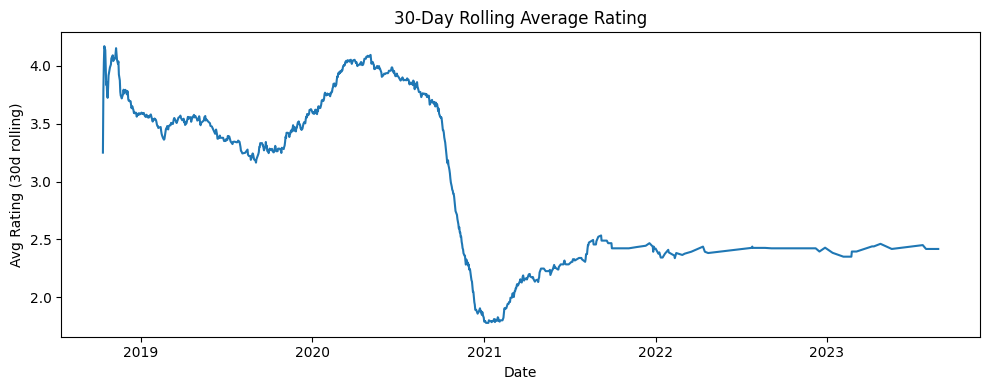

In [454]:
import pandas as pd
import matplotlib.pyplot as plt

# starting df is the CAH df
# convert timestamp ms -> datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['date'] = df['timestamp'].dt.floor('D')

# DAILY average rating + count of reviews per day
daily = df.groupby('date').agg(
    avg_rating=('rating', 'mean'),
    n_reviews=('rating', 'count')
)

# filter out low-volume noise days (change >=3 to >=5 or >=10 if you want stricter)
daily = daily[daily['n_reviews'] >= 1]

# rolling 30-day average of rating
rolling_rating = daily['avg_rating'].rolling(window=90, min_periods=1).mean()

# plot
plt.figure(figsize=(10,4))
plt.plot(rolling_rating.index, rolling_rating.values)
plt.title("30-Day Rolling Average Rating")
plt.xlabel("Date")
plt.ylabel("Avg Rating (30d rolling)")
plt.tight_layout()
plt.show()


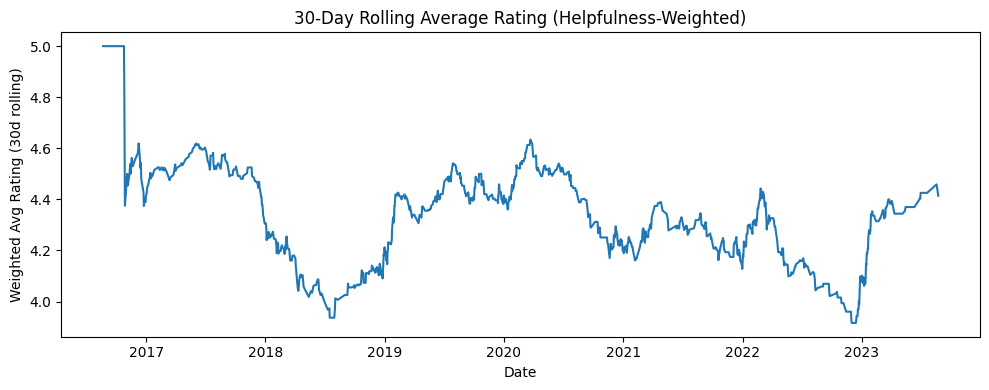

In [445]:
import pandas as pd
import matplotlib.pyplot as plt

# --- prep ---
# ensure datetime (ms -> datetime)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['date'] = df['timestamp'].dt.floor('D')

# helpful_vote to numeric, fill NAs
df['helpful_vote'] = pd.to_numeric(df['helpful_vote'], errors='coerce').fillna(0)

# weights (+1 so zero-vote reviews still count)
df['weight'] = (df['helpful_vote'] + 1)

# weighted rating per review
df['weighted_rating'] = df['rating'] * df['weight']

# --- daily aggregation (all named, no ambiguous lambdas) ---
daily = df.groupby('date').agg(
    w_rating_sum=('weighted_rating', 'sum'),
    weight_sum=('weight', 'sum'),
    n_reviews=('rating', 'count')
)

# optional: drop super-sparse days (change 3 as you like)
daily = daily[daily['n_reviews'] >= 1]

# weighted average rating by day
daily['weighted_avg_rating'] = daily['w_rating_sum'] / daily['weight_sum']

# --- 30-day rolling average of weighted rating ---
rolling_w = daily['weighted_avg_rating'].rolling(window=90, min_periods=1).mean()

# --- plot ---
plt.figure(figsize=(10,4))
plt.plot(rolling_w.index, rolling_w.values)
plt.title("30-Day Rolling Average Rating (Helpfulness-Weighted)")
plt.xlabel("Date")
plt.ylabel("Weighted Avg Rating (30d rolling)")
plt.tight_layout()
plt.show()

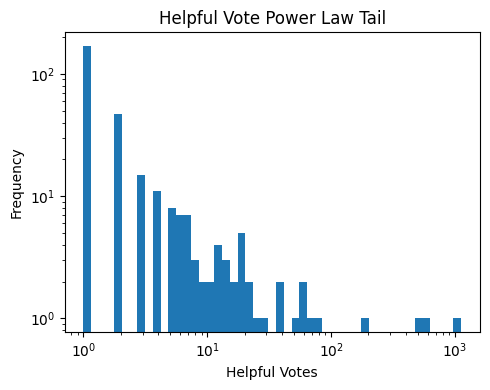

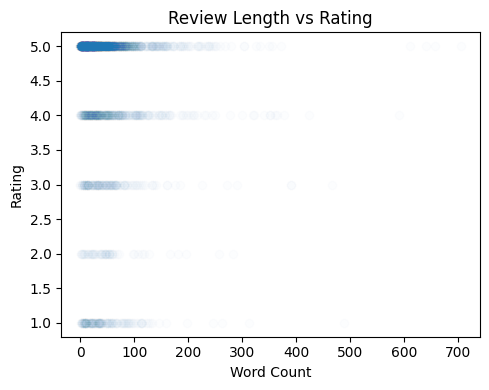

            review_len    rating
review_len    1.000000 -0.069597
rating       -0.069597  1.000000


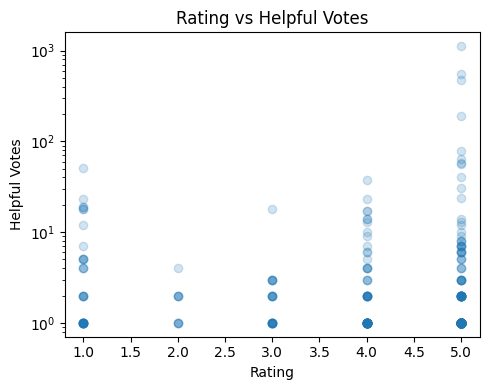

                rating  helpful_vote
rating        1.000000      0.016058
helpful_vote  0.016058      1.000000


In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Helpful vote power law
votes = df['helpful_vote'].fillna(0).astype(int)
plt.figure(figsize=(5,4))
plt.hist(votes[votes>0], bins=np.logspace(0, np.log10(votes.max()+1), 50))
plt.xscale('log'); plt.yscale('log')
plt.title("Helpful Vote Power Law Tail")
plt.xlabel("Helpful Votes"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

# Length vs rating
df['review_len'] = df['text'].fillna("").str.split().str.len()
plt.figure(figsize=(5,4))
plt.scatter(df['review_len'], df['rating'], alpha=0.01)
plt.title("Review Length vs Rating")
plt.xlabel("Word Count"); plt.ylabel("Rating")
plt.tight_layout(); plt.show()
print(df[['review_len','rating']].corr())

# Rating vs helpful votes
plt.figure(figsize=(5,4))
plt.scatter(df['rating'], df['helpful_vote'], alpha=0.2)
plt.title("Rating vs Helpful Votes")
plt.xlabel("Rating"); plt.ylabel("Helpful Votes")
plt.yscale('log'); plt.tight_layout(); plt.show()
print(df[['rating','helpful_vote']].corr())

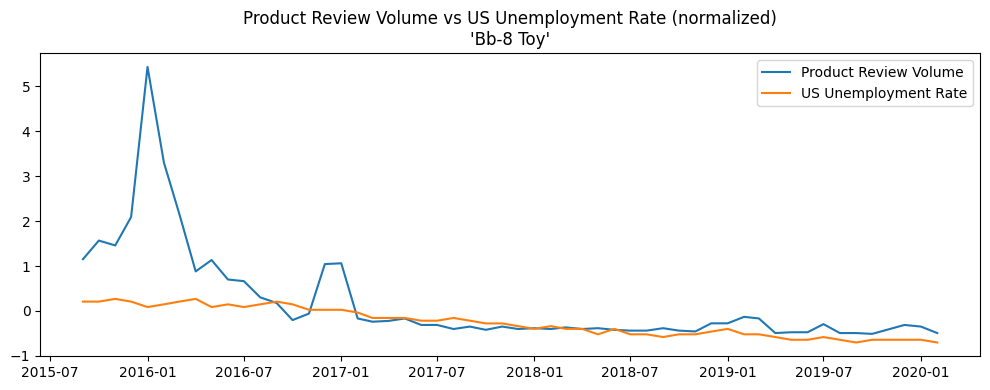

          reviews    UNRATE
reviews  1.000000  0.649512
UNRATE   0.649512  1.000000


In [263]:
unemp = pd.read_csv("unemployment.csv")
unemp = unemp.rename(columns = {' month ': 'month'})
unemp.columns

# assume unemployment df is called `unemp`
unemp['date'] = pd.to_datetime(unemp['year'].astype(str) + '-' + unemp['month'].astype(str) + '-01')
unemp = unemp[['date','UNRATE']].set_index('date').sort_index()

# CAH df already exists as df
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()
monthly_reviews = df.groupby('month').size().to_frame('reviews')

# merge
merged = monthly_reviews.join(unemp, how='inner')

# normalize (so both can be plotted on same y axis)
merged['reviews_norm'] = (merged['reviews'] - merged['reviews'].mean()) / merged['reviews'].std()
merged['unrate_norm']  = (merged['UNRATE'] - merged['UNRATE'].mean()) / merged['UNRATE'].std()
merged = merged[merged.index < pd.to_datetime("2020-03-01")]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(merged.index, merged['reviews_norm'], label='Product Review Volume')
plt.plot(merged.index, merged['unrate_norm'], label='US Unemployment Rate')
plt.legend()
plt.title(f"Product Review Volume vs US Unemployment Rate (normalized)\n'{formalProdName}'")
plt.tight_layout()
plt.show()

# correlation
print(merged[['reviews','UNRATE']].corr())

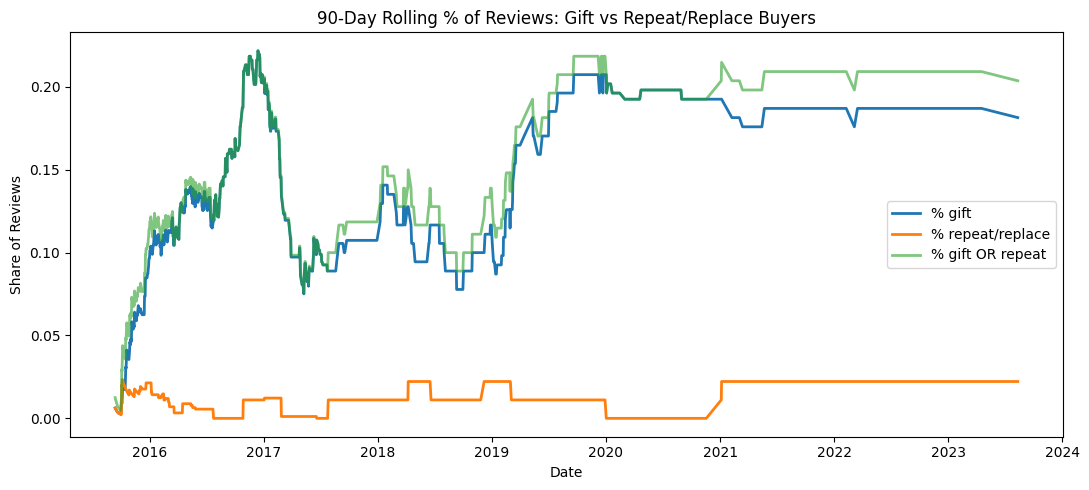


Top repeat/replace reasons:
repeat_tags
rep_keyword          7
rep_second_copy      4
rep_replace_old      4
rep_extra_backup     2
rep_replace_thing    2
rep_damaged          1
rep_another_one      1
Name: count, dtype: int64

Sample flagged reviews (repeat/replace):
                                                  title  \
2038  My only gripe with the app so far is that i'd ...   
323   Great technology, although not so much a "toy"...   
255                              Fantastic and Adorable   
506                                    No Charging base   
1413   They love it and I think it was a great gift ...   
1228                                       Poor quality   
836           Well made toy, evil and clueless company.   
107   Amazing product with a lot of options to progr...   
1476      A drunk little droid whose battery is no more   
1043                                  Not Worth a penny   

                                                   text  \
2038  This is the dro

In [264]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Timestamp/date (keep if not already done) ---
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", utc=True).dt.tz_convert(None)
df["date"] = df["timestamp"].dt.floor("D")

# --- 2) Gift detector (enhanced) ---
REL = r"(my|our|their|his|her)\s+(friend|bestie|boyfriend|girlfriend|fianc[ée]|husband|wife|spouse|partner|coworker|co[- ]?worker|colleague|boss|manager|mom|mother|dad|father|son|daughter|kid|teen|brother|sister|nephew|niece|roommate|neighbor|in[- ]law)"
HOL = r"(birthday|bday|christmas|xmas|hanukkah|holiday|valentine'?s|anniversary|easter|new year'?s)"
EVT = r"(wedding|housewarming|bachelor(?:ette)?|bridal(?:\s+shower)?|baby(?:\s+shower)?)"
XCH = r"(secret\s+santa|white\s+elephant|yankee\s+swap|stock(?:ing)?\s+stuffer|gag\s+gift)"

GIFT_PATTERNS = [
    (r"\b(gift|present)\b", "gift_keyword"),
    (r"\b(as\s+a\s+gift|as\s+this\s+gift)\b", "as_a_gift"),
    (rf"\b(bought|got|purchased|ordered)\s+(it|this)?\s*(for|as)\s+(a\s+)?(gift|present)\b", "bought_as_gift"),
    (rf"\b(gave|give|giving)\s+(it|this)?\s*(as\s+)?(a\s+)?(gift|present)\b", "gave_as_gift"),
    (rf"\b(bought|got|purchased|ordered)\s+(it|this)?\s*for\s+{REL}\b", "bought_for_relation"),
    (rf"\b(gave|give|giving)\s+(it|this)?\s*to\s+{REL}\b", "gave_to_relation"),
    (rf"\b(for|to)\s+{REL}\s*(as\s+)?(a\s+)?(gift|present)?\b", "for_relation"),
    (rf"\b{HOL}\s+(gift|present)\b", "holiday_gift"),
    (rf"\b(Purchased|Bought|Got)\s+(as\s+)?(a\s+)?{HOL}\s+(gift|present)\b", "bought_holiday_gift"),
    (rf"\b{EVT}\s+(gift|present)\b", "event_gift"),
    (rf"\b{XCH}\b", "exchange_or_stuffer"),
    (r"\b(gifted|gifting)\b(?!\s+(writer|author|storyteller|artist|musician))", "gifted_or_gifting"),
]
GIFT_NEG = [r"\b(not|wasn'?t|isn'?t|never)\s+(a\s+)?gift\b",
            r"\b(not|wasn'?t|isn'?t|never)\s+intended\s+as\s+(a\s+)?gift\b"]

# --- 3) Repeat/replace detector (NEW) ---
REP_PATTERNS = [
    (r"\breplacement\b", "rep_keyword"),
    (r"\breplace(d|ment)?\s+(my|our|the|this|old)\b", "rep_replace_old"),
    (r"\breplacing\b\s+(my|our|the|this|old)\b", "rep_replacing_old"),
    (r"\breplace\b.*\b(set|deck|copy|one|game|cards)\b", "rep_replace_thing"),
    (r"\b(lost|misplaced|missing|stolen)\b.*\b(set|deck|cards|game|copy)\b", "rep_lost"),
    (r"\b(damaged|ruined|water[- ]?damaged|spilled|bent|torn|worn\s*out|wore\s*out)\b.*\b(set|deck|cards|game|copy)\b", "rep_damaged"),
    (r"\b(extra|backup|spare|additional)\b.*\b(set|deck|copy|one|game)\b", "rep_extra_backup"),
    (r"\b(second|third|another)\s+(set|deck|copy|one|game)\b", "rep_second_copy"),
    (r"\banother\s+one\b", "rep_another_one"),
    (r"\b(already\s+own|already\s+owned|we\s+already\s+own|own(ed)?\s+this\s+already)\b", "rep_already_own"),
    (r"\b(had\s+this\s+before|previously\s+had|used\s+to\s+have)\b", "rep_had_before"),
    (r"\b(bought|purchased|got)\s+(it|this)?\s+again\b", "rep_bought_again"),
    (r"\b(re[- ]?bought|re[- ]?purchased|buying\s+again)\b", "rep_rebought"),
]
REP_NEG = [
    r"\b(not|isn'?t|wasn'?t)\s+(a\s+)?replacement\b",
    r"\b(not|isn'?t|wasn'?t)\s+(getting|buying)\s+another\b",
]

gift_re = [(re.compile(p, re.I), tag) for p, tag in GIFT_PATTERNS]
gift_neg_re = [re.compile(p, re.I) for p in GIFT_NEG]
rep_re = [(re.compile(p, re.I), tag) for p, tag in REP_PATTERNS]
rep_neg_re = [re.compile(p, re.I) for p in REP_NEG]

def detect_patterns(row):
    txt = f"{row.get('title','')} {row.get('text','')}"
    tags = []

    # gift negation
    if not any(n.search(txt) for n in gift_neg_re):
        for rgx, tag in gift_re:
            if rgx.search(txt):
                tags.append(tag)

    # repeat/replace negation
    if not any(n.search(txt) for n in rep_neg_re):
        for rgx, tag in rep_re:
            if rgx.search(txt):
                tags.append(tag)

    return tags

# Apply
tags = df.apply(detect_patterns, axis=1)
df["gift_tags"] = tags.apply(lambda t: ";".join([x for x in t if x.startswith("gift")]))
df["repeat_tags"] = tags.apply(lambda t: ";".join([x for x in t if x.startswith("rep_")]))

df["gift_flag"] = df["gift_tags"].str.len().gt(0)
df["repeat_flag"] = df["repeat_tags"].str.len().gt(0)
df["gift_or_repeat_flag"] = df["gift_flag"] | df["repeat_flag"]

# --- 4) Daily rates + 90-day smoothing ---
daily = df.groupby("date").agg(
    reviews=("gift_or_repeat_flag","size"),
    pct_gift=("gift_flag", lambda s: s.mean()),
    pct_repeat=("repeat_flag", lambda s: s.mean()),
    pct_gift_or_repeat=("gift_or_repeat_flag", lambda s: s.mean()),
)

# require at least 10 days for a rolling value
rolling = daily.rolling(90, min_periods=10).mean()

# start plotting from the 10th row (index 9)
rolling_plot = rolling.iloc[9:]

# --- 5) Plot: gift vs repeat (and combined) ---
plt.figure(figsize=(11,5))
plt.plot(rolling_plot.index, rolling_plot["pct_gift"], label="% gift", linewidth=2)
plt.plot(rolling_plot.index, rolling_plot["pct_repeat"], label="% repeat/replace", linewidth=2)
plt.plot(rolling_plot.index, rolling_plot["pct_gift_or_repeat"], label="% gift OR repeat", linewidth=2, alpha=0.6)
plt.title("90-Day Rolling % of Reviews: Gift vs Repeat/Replace Buyers")
plt.xlabel("Date"); plt.ylabel("Share of Reviews")
plt.legend()
plt.tight_layout(); plt.show()

# --- 6) Quick diagnostics: top reasons + sample rows ---
print("\nTop repeat/replace reasons:")
print(df.loc[df["repeat_flag"], "repeat_tags"].str.split(";").explode().value_counts().head(12))

print("\nSample flagged reviews (repeat/replace):")
sample_cols = ["title","text","repeat_tags"]
print(df.loc[df["repeat_flag"], sample_cols].sample(min(10, df["repeat_flag"].sum()), random_state=42))

In [149]:
food_df = pd.read_csv("food_data.csv")
food_df.head()

,series_id,year,month,value
0,APU0000711211,2015,1,0.583
1,APU0000711211,2015,2,0.591
2,APU0000711211,2015,3,0.593
3,APU0000711211,2015,4,0.597
4,APU0000711211,2015,5,0.582


In [150]:
food_df = pd.read_csv("fuel_data.csv")
food_df.head()

,series_id,year,month,value
0,APU000072610,2015,1,0.138
1,APU000072610,2015,2,0.138
2,APU000072610,2015,3,0.136
3,APU000072610,2015,4,0.137
4,APU000072610,2015,5,0.137


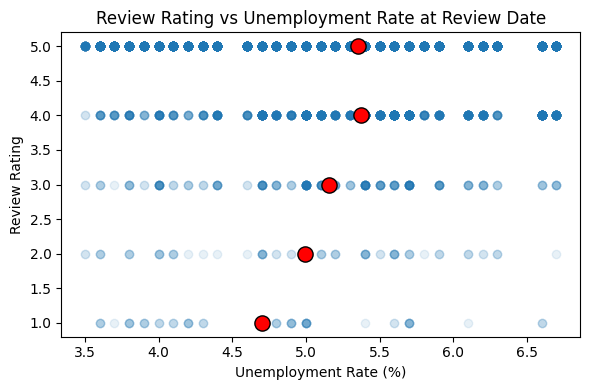

In [151]:
unemp = pd.read_csv("unemployment.csv")
unemp = unemp.rename(columns = {' month ': 'month'})

# normalize unemployment df columns if needed
unemp.columns = unemp.columns.str.strip().str.lower()

unemp['date'] = pd.to_datetime(unemp['year'].astype(str) + '-' + unemp['month'].astype(str) + '-01')
unemp = unemp[['date','unrate']].set_index('date').sort_index()

# reviews timestamp + extract month
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# merge unemployment rate into individual review rows
df2 = df.merge(unemp, left_on='month', right_index=True, how='left')
df2 = df2[(df2['timestamp'] >= '2014-01-01') & (df2['timestamp'] <= '2020-01-01')]


# scatter plot: rating vs unemployment at time of review
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df2['unrate'], df2['rating'], alpha=0.1)

# avg unemployment for each rating
avg_unemp_by_rating = df2.groupby('rating')['unrate'].mean()
for r, u in avg_unemp_by_rating.items():
    plt.scatter(u, r, color='red', s=120, edgecolor='black', zorder=5)

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Review Rating")
plt.title("Review Rating vs Unemployment Rate at Review Date")
plt.tight_layout()
plt.show()

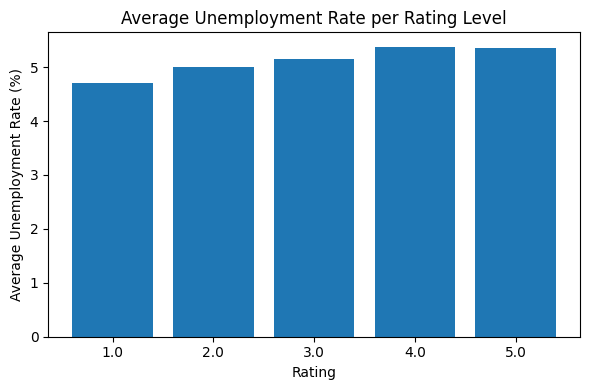

/var/folders/90/ybb1lgk97ps0xd9bk9cqkclh0000gn/T/ipykernel_60908/2644111567.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_unemp = df2.groupby('unemp_bin')['rating'].mean()


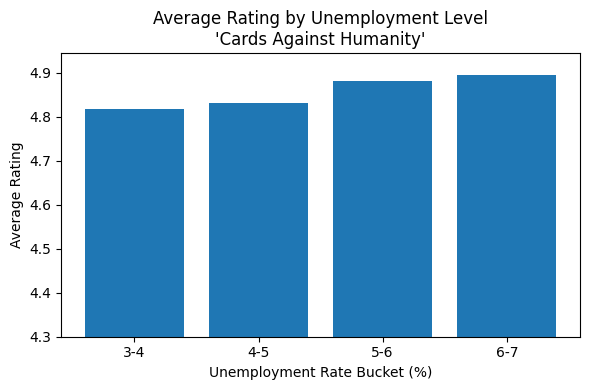

In [152]:
unemp = pd.read_csv("unemployment.csv")
unemp = unemp.rename(columns = {' month ': 'month'})

# normalize unemployment df columns if needed
unemp.columns = unemp.columns.str.strip().str.lower()

unemp['date'] = pd.to_datetime(unemp['year'].astype(str) + '-' + unemp['month'].astype(str) + '-01')
unemp = unemp[['date','unrate']].set_index('date').sort_index()

# reviews timestamp + extract month
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# merge unemployment rate into individual review rows
df2 = df.merge(unemp, left_on='month', right_index=True, how='left')
df2 = df2[(df2['timestamp'] >= '2014-01-01') & (df2['timestamp'] <= '2020-01-01')]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- average unemployment per rating ---
avg_unemp_by_rating = df2.groupby('rating')['unrate'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_unemp_by_rating.index.astype(str), avg_unemp_by_rating.values)
plt.xlabel("Rating")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate per Rating Level")
plt.tight_layout()
plt.show()


# --- average rating per unemployment bucket ---
unemp = pd.read_csv("unemployment.csv")
unemp = unemp.rename(columns = {' month ': 'month'})

# normalize unemployment df columns if needed
unemp.columns = unemp.columns.str.strip().str.lower()

unemp['date'] = pd.to_datetime(unemp['year'].astype(str) + '-' + unemp['month'].astype(str) + '-01')
unemp = unemp[['date','unrate']].set_index('date').sort_index()

# reviews timestamp + extract month
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True).dt.tz_convert(None)
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# merge unemployment rate into individual review rows
df2 = df.merge(unemp, left_on='month', right_index=True, how='left')
df2 = df2[(df2['timestamp'] >= '2014-01-01') & (df2['timestamp'] <= '2020-01-01')]
bins = [3,4,5,6,7,8,20]
labels = ["3-4","4-5","5-6","6-7","7-8","8+"] 
df2['unemp_bin'] = pd.cut(df2['unrate'], bins=bins, labels=labels, include_lowest=True)

avg_rating_by_unemp = df2.groupby('unemp_bin')['rating'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_rating_by_unemp.index.astype(str), avg_rating_by_unemp.values)
plt.ylim(4.3, avg_rating_by_unemp.max()+0.05)  # <-- sets floor at 4
plt.xlabel("Unemployment Rate Bucket (%)")
plt.ylabel("Average Rating")
plt.title(f"Average Rating by Unemployment Level\n'{formalProdName}'")
plt.tight_layout()
plt.show()
